<a href="https://colab.research.google.com/github/quantum-intelligence/materials-informatics-tutorial/blob/main/GDS_tutorial_2025_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GDS Tutorial 2025**
# Unsupervised learning tutorial

Preliminary activities:
- switch to a gpu runtime type
- install the packages below

In [ ]:
!pip install pymatgen pandas tensorflow keras numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 45.3 MB/s eta 0:00:00


In [ ]:
!pip install ace-tools

In [ ]:
# import useful python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#K-means clustering

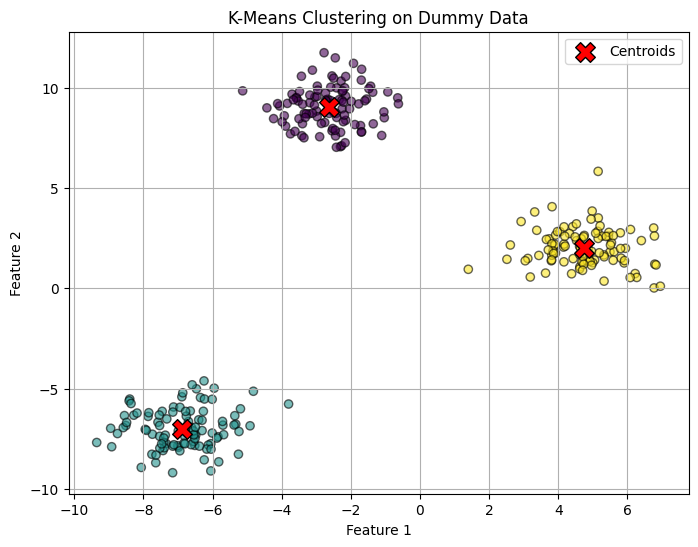

In [ ]:
# import useful modeules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate dummy data with 3 clusters using make_blobs()
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
kmeans.fit(X)
y_pred = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', edgecolors='black', label="Centroids")

plt.title("K-Means Clustering on Dummy Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


### Question:
- How can K-means clustering be applied to learn patterns in 'real world' data?

# Principal components analysis

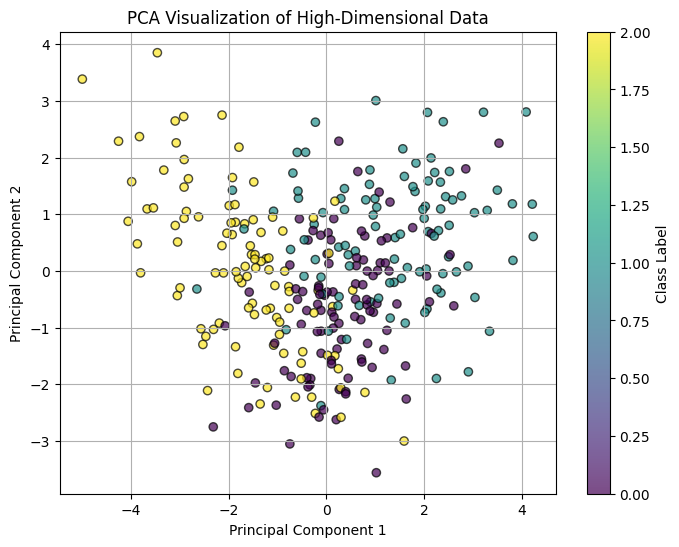

Explained variance by PC1 & PC2: 48.82%


In [ ]:
# import useful modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate high-dimensional dummy data (10 features) using sklearn.datasets.make_classification()
n_samples = 300
n_features = 10
n_classes = 3
random_state = 42

X, y = make_classification(n_samples=n_samples, n_features=n_features,
                           n_informative=5, n_clusters_per_class=1,
                           n_classes=n_classes, random_state=random_state)

# Standardize the features (PCA works better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of High-Dimensional Data")
plt.colorbar(label="Class Label")
plt.grid(True)
plt.show()

# Print explained variance ratio
print(f"Explained variance by PC1 & PC2: {pca.explained_variance_ratio_.sum():.2%}")


### Question:
- How can PCA be applied to learn patterns in 'real world' data?

## Access Materials Project
- create an account with the materials project
- input your API_KEY below:

In [ ]:
from pymatgen.ext.matproj import MPRester
# Replace with your Materials Project API key
API_KEY = "<insert your key here>"
mpr = MPRester(API_KEY)

#Associative learning
- The cell below pulls data from the materials project (https://next-gen.materialsproject.org/)
- You will need an account and an API key to use this free service

In [ ]:
# import useful modules
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Query oxide materials with band gap data and formation energy per atom data
materials_data = mpr.query(
    {"elements": {"$in": ["O","Se","Te"]}, "band_gap": {"$gt": 0}},  # Select materials containing oxygen & nonzero band gap
    ["task_id", "pretty_formula", "elements", "band_gap", "e_above_hull", "formation_energy_per_atom"]
)

# you can pickle the result and save to your google drive to reload data with ease.

/usr/local/lib/python3.11/dist-packages/pymatgen/ext/matproj.py:419: FutureWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  return _MPResterLegacy(*args, **kwargs)
100%|██████████| 48123/48123 [00:47<00:00, 1002.81it/s]


In [ ]:
# Convert to DataFrame
df = pd.DataFrame(materials_data)

# Define band gap categories
def categorize_band_gap(bg):
    if bg < 1:
        return "Low Band Gap"
    elif 1 <= bg < 3:
        return "Medium Band Gap"
    else:
        return "High Band Gap"

# Define formation energy categories
def categorize_formation_energy(ef):
    if ef > -1.0:
        return "Low stability"
    elif -3.0 < ef <= -1.0:
        return "Medium stability"
    else:
        return "High stability"
# Apply categorization

use_formation_energy = True
if use_formation_energy:
  df["Formation Energy Category"] = df["formation_energy_per_atom"].apply(categorize_formation_energy)
else:
  # use the band gap info
  df["Band Gap Category"] = df["band_gap"].apply(categorize_band_gap)

# One-hot encode elements
unique_elements = set(el for elems in df["elements"] for el in elems)
for element in unique_elements:
    df[element] = df["elements"].apply(lambda x: 1 if element in x else 0)

# One-hot encode band gap categories
if use_formation_energy:
  df = pd.get_dummies(df, columns=["Formation Energy Category"])
else:
  df = pd.get_dummies(df, columns=["Band Gap Category"])

df_mp = df.copy()

In [ ]:
# inspect data downloaded from the materials project
print("Number of data entries from the materials project: ", df_mp.shape[0])
print("Number of data attributes: ", df_mp.shape[1])
df_mp.head()

Number of data entries from the materials project:  48123
Number of data attributes:  96


,task_id,pretty_formula,elements,band_gap,e_above_hull,formation_energy_per_atom,Al,Lu,Tb,N,...,Ag,Ir,Ce,Pr,Mg,Re,In,Formation Energy Category_High stability,Formation Energy Category_Low stability,Formation Energy Category_Medium stability
0,mp-1007768,ZnHCO4,"[C, H, O, Zn]",0.0006,0.104707,-1.501509,0,0,0,0,...,0,0,0,0,0,0,0,False,False,True
1,mp-1008867,NaCuO,"[Cu, Na, O]",0.0017,0.539694,-0.701211,0,0,0,0,...,0,0,0,0,0,0,0,False,True,False
2,mp-1019735,BaNaEu(SiO3)3,"[Ba, Eu, Na, O, Si]",0.0037,0.000000,-3.241666,0,0,0,0,...,0,0,0,0,0,0,0,True,False,False
3,mp-1025578,Te2W3(SeS)2,"[S, Se, Te, W]",0.0039,0.065502,-0.575952,0,0,0,0,...,0,0,0,0,0,0,0,False,True,False
4,mp-1031308,KMg6BO8,"[B, K, Mg, O]",0.0029,0.664286,-2.297971,0,0,0,0,...,0,0,0,0,1,0,0,False,False,True


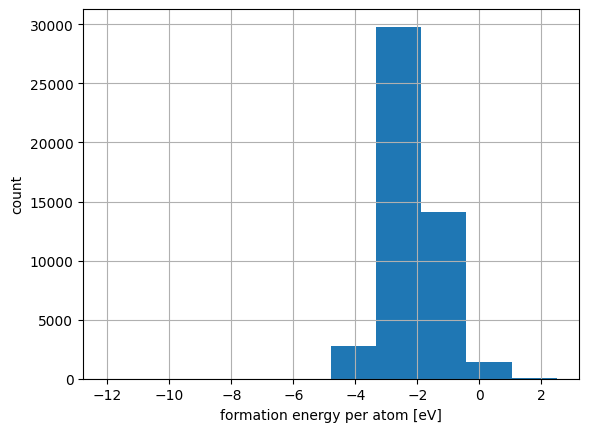

In [ ]:
# Visualize the formation energy data
df_mp.formation_energy_per_atom.hist()
plt.xlabel("formation energy per atom [eV]")
plt.ylabel("count")
plt.show()

Calculate the association rules using the apriori alogrithm:

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=["elements", "task_id", "pretty_formula", "band_gap", "e_above_hull", "formation_energy_per_atom"])

# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
select_rules_columns = ['antecedents', 'consequents',  'support', 'confidence', 'lift']

In [ ]:
rules.loc[:5,select_rules_columns]

,antecedents,consequents,support,confidence,lift
0,(O),(N),0.057582,0.062726,1.022555
1,(N),(O),0.057582,0.938686,1.022555
2,(O),(F),0.075640,0.082398,1.057675
3,(F),(O),0.075640,0.970926,1.057675
4,(Formation Energy Category_Medium stability),(F),0.063940,0.084085,1.079332
5,(F),(Formation Energy Category_Medium stability),0.063940,0.820752,1.079332


In [ ]:
# Display results for a set of criteria defined by the support and confidence
support_criterion = rules.support > 0.11
confidence_criterion = rules.confidence > 0.50
rules[support_criterion & confidence_criterion][select_rules_columns]

,antecedents,consequents,support,confidence,lift
18,(Li),(O),0.244332,0.993074,1.081803
25,(Li),(Formation Energy Category_Medium stability),0.234545,0.953294,1.253631
28,(P),(O),0.182657,0.980152,1.067725
30,(Mn),(O),0.118259,0.987335,1.075551
36,(H),(O),0.114852,0.987846,1.076108
46,(Formation Energy Category_High stability),(O),0.134406,0.998765,1.088001
48,(Formation Energy Category_Medium stability),(O),0.734618,0.966060,1.052375
49,(O),(Formation Energy Category_Medium stability),0.734618,0.800254,1.052375
51,(P),(Formation Energy Category_Medium stability),0.169171,0.907783,1.193782
53,(Mn),(Formation Energy Category_Medium stability),0.113418,0.946912,1.245238


### Question:
- Can these results be easily interpreted?
- What's a plausible interpretation?
- What would you change to improve interpretability? [Hint: Consider the data distribution and the choice of descriptors]

# Generative modeling
- Leveraging variational autoencoders (VAEs) from materials discovery

Install Required Libraries to implement the VAE

In [ ]:
pip install pymatgen pandas tensorflow keras numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 31.1 MB/s eta 0:00:00


 Fetch Materials Data from Materials Project

In [ ]:
# import useful modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Query for materials with compositions
materials_data_gm = mpr.query(
    criteria={"elements": {"$in": ["O", "Fe", "Ti", "Ni", "Zn"]}},  # Example elements
    properties=["pretty_formula", "elements", "formation_energy_per_atom", "band_gap"]
)

100%|██████████| 73472/73472 [01:11<00:00, 1031.11it/s]


In [ ]:
# Convert to DataFrame
df = pd.DataFrame(materials_data_gm)

In [ ]:
df.head()

,pretty_formula,elements,formation_energy_per_atom,band_gap
0,FeP,"[Fe, P]",-0.584660,0.0
1,Fe3Ni,"[Fe, Ni]",0.036530,0.0
2,FeNi3,"[Fe, Ni]",0.277117,0.0
3,FeNi3,"[Fe, Ni]",-0.070765,0.0
4,Fe3Ni,"[Fe, Ni]",0.132141,0.0


In [ ]:
# Get a list of unique elements
unique_elements = sorted(set(el for elems in df["elements"] for el in elems))

# One-hot encode elemental composition
for element in unique_elements:
    df[element] = df["elements"].apply(lambda x: 1 if element in x else 0)

# Normalize formation energy
scaler = StandardScaler()
df["formation_energy_per_atom"] = scaler.fit_transform(df[["formation_energy_per_atom"]])

# Drop unused columns
df = df.drop(columns=["elements", "pretty_formula"])
df_X = df.copy()
df_X = df_X.drop(columns=["formation_energy_per_atom","band_gap"])

# Convert to NumPy array for training
X = df_X.to_numpy()

# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

What do the data look like?

In [ ]:
df_X.head()

,Ac,Ag,Al,As,Au,B,Ba,Be,Bi,Br,...,Tl,Tm,U,V,W,Xe,Y,Yb,Zn,Zr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Build the Variational Autoencoder (VAE)
 A VAE consists of:

- Encoder: Maps input materials to a latent space.
- Latent Space: Compressed, meaningful representation of materials.
- Decoder: Generates new material compositions from the latent space

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define dimensions
input_dim = X.shape[1]
latent_dim = 5  # Size of the compressed representation

# Encoder
inputs = keras.Input(shape=(input_dim,))
h = layers.Dense(32, activation="relu")(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Encoder
encoder = keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# Decoder
# decoder_input = keras.Input(shape=(latent_dim,))
# d = layers.Dense(32, activation="relu")(decoder_input)
# outputs = layers.Dense(input_dim, activation="sigmoid")(d)

# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(32, activation="relu")(latent_inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(X_scaled.shape[1], activation="linear")(x)

decoder = keras.Model(latent_inputs, outputs, name="decoder")
decoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 87)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 32)             │          2,816 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 5)              │            165 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 5)              │            165 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 5)              │              0 │ dense_7[0][0],         │
│                           │                        │                │ dense_8[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,146 (12.29 KB)

 Trainable params: 3,146 (12.29 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 87)                  │           5,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,959 (31.09 KB)

 Trainable params: 7,959 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

# Initialize VAE
vae = VAE(encoder, decoder)

# Define loss function
mse_loss_fn = keras.losses.MeanSquaredError()

def vae_loss(y_true, y_pred):
    z_mean, z_log_var, _ = encoder(y_true)
    mse = mse_loss_fn(y_true, y_pred)
    kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    return mse + kl_loss

# Compile the model
vae.compile(optimizer=keras.optimizers.Adam(), loss=vae_loss)

# Train the VAE
vae.fit(X_scaled, X_scaled, epochs=5, batch_size=32)


Epoch 1/5
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 7539575808.0000
Epoch 2/5
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 13309365.0000
Epoch 3/5
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 7161451.5000
Epoch 4/5
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 896128.2500
Epoch 5/5
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 622252.0000


Generate New Materials
- Once the VAE is trained, we can sample new materials from the latent space.
- Are the results easily interpretable? How can we modify the process or the ML input to overcome challenges linked to interpretability?

In [ ]:
import numpy as np

# Sample from latent space
num_new_samples = 10
z_new = np.random.normal(size=(num_new_samples, latent_dim))

# Decode to material representations
generated_materials = decoder.predict(z_new)

# Convert back to original scale
generated_materials = scaler.inverse_transform(generated_materials)

# Display generated features
pd.DataFrame(generated_materials, columns=df_X.columns).head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


,Ac,Ag,Al,As,Au,B,Ba,Be,Bi,Br,...,Tl,Tm,U,V,W,Xe,Y,Yb,Zn,Zr
0,-0.000899,0.015145,0.034027,0.028071,0.001641,0.056423,0.071095,0.009237,0.039503,0.017309,...,0.020473,0.001953,0.015699,0.088835,0.028554,0.001623,0.022840,0.003490,0.078231,0.025655
1,0.000220,0.016094,0.038152,0.022108,0.004283,0.034500,0.054857,0.005090,0.043102,0.017029,...,0.015488,0.004087,0.016454,0.079441,0.023934,0.002036,0.029856,0.006595,0.089875,0.023696
2,-0.001352,0.015905,0.039521,0.018798,0.002634,0.035868,0.049905,0.007411,0.028638,0.018363,...,0.010893,0.003477,0.010816,0.090305,0.034689,0.000463,0.030922,0.001925,0.094952,0.015167
3,0.002639,0.021750,0.041329,0.023611,0.004900,0.025266,0.050763,-0.000496,0.049326,0.013075,...,0.017276,0.004226,0.021140,0.066111,0.028937,0.001940,0.033494,0.009800,0.089722,0.017990
4,-0.000355,0.015838,0.062241,0.028124,0.015882,0.025302,0.062212,-0.001026,0.024817,0.003439,...,0.005191,-0.000010,0.003892,0.089874,0.023946,-0.000537,0.035874,0.000828,0.061536,0.013487


Interpretation of Generated Materials
- Each row represents a synthetic material composition.
- The values for each element indicate its presence in the new material.
- Formation energy per atom provides an estimate of material stability.

## Question:
- How do we selecxt for interesting materials? How do we define interesting?
- What are some challenges with this representation that need to be overcome to be able to implement a framework for materials design?

## Visualizing the Latent Space of the VAE

- Visualizing the latent space helps us understand how the VAE encodes materials and how different materials are related.

- We reduce the latent space to 2D using PCA.
- Plot materials in the latent space to see clusters of similar compositions.
- Color-code materials by their formation energy to observe trends.


Use t-SNE to Visualize Latent Representations

---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

run_full_space = False  #takes a long time to calculate all the rows

if run_full_space:
  # Encode materials into latent space
  z_mean, _, _ = encoder.predict(X_scaled)

  # Apply t-SNE to reduce dimensionality to 2D
  tsne = TSNE(n_components=2, perplexity=30, random_state=42)
  z_2d = tsne.fit_transform(z_mean)
else:
  # Encode materials into latent space
  z_mean, _, _ = encoder.predict(X_scaled)
  # Apply t-SNE to reduce dimensionality to 2D
  tsne = TSNE(n_components=2, perplexity=30, random_state=42)
  subset_data = 500
  z_2d = tsne.fit_transform(z_mean[:subset_data,:])


2296/2296 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


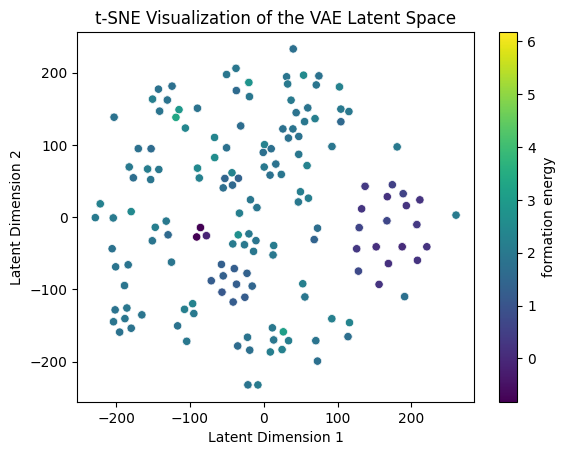

In [ ]:
# Convert to DataFrame
df_latent = pd.DataFrame(z_2d, columns=["Latent_X", "Latent_Y"])
df_latent["formation_energy_per_atom"] = df["formation_energy_per_atom"]  # Add formation energy info for coloring

# Plot
fig, ax = plt.subplots()


# plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x="Latent_X", y="Latent_Y", hue="formation_energy_per_atom", palette="viridis", data=df_latent, legend=False)

c = df_latent["formation_energy_per_atom"]
norm = plt.Normalize(vmin=min(c), vmax=max(c))
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Only needed for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("formation energy")

#plt.colorbar(label="Band Gap (eV)")
plt.title("t-SNE Visualization of the VAE Latent Space")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

In [ ]:
visualize_formation_energy_data = False
if visualize_formation_energy_data:
  df_latent.formation_energy_per_atom.hist()
  plt.xlabel("formation energy per atom [eV]")
  plt.ylabel("count")
  plt.show()

Use PCA to Visualize the Latent Space

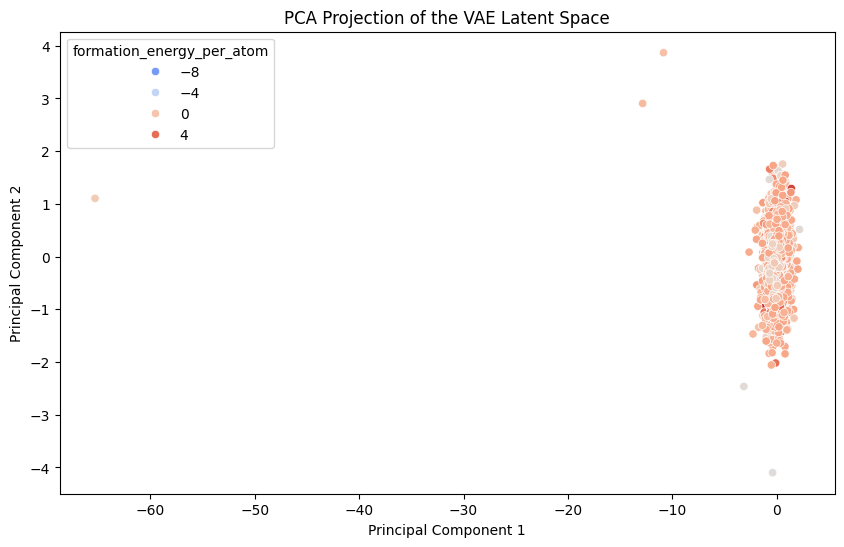

In [ ]:
from sklearn.decomposition import PCA

# Reduce latent space to 2D using PCA
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z_mean)

# Convert to DataFrame
df_pca = pd.DataFrame(z_pca, columns=["PC1", "PC2"])
df_pca["formation_energy_per_atom"] = df["formation_energy_per_atom"]

# Plot PCA latent space
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="formation_energy_per_atom", palette="coolwarm", data=df_pca)
#plt.colorbar(label="formation_energy_per_atom (eV)")
plt.title("PCA Projection of the VAE Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Interpretation of the Visualization
- Clusters: Similar materials should cluster together.
- Formation Energy Trends: If formation energy correlates with latent space structure, we might find regions of stable/unstable materials.
- Outliers: These could be unusual materials with unique properties.

--------------------------------------------------------------------------------
# Research Challenge: vdW Magnet informatics

### Download 2D magnetic materials formation energies data set:

Download data from :
https://archive.materialscloud.org/record/2019.0020/v1

Description of data and corresponding study can be found here:
https://www.nature.com/articles/s41598-020-72811-z

- save the file to your google drive (with colab) or your local drive (jupyter notebook).
- Can also upload from github: https://github.com/quantum-intelligence/materials-informatics-tutorial

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls drive/MyDrive/GDS_Tutorial_2025

Open and load "magneticmoment_Ef_data.csv" using pandas.

In [ ]:
# Create dataframe of "CGT_materials_data.csv" using pandas.
# Change the path to CGT_materials_data.csv as needed.
data_path = "drive/MyDrive/GDS_Tutorial_2025/CGT_materials_data.csv"
df = pd.read_csv(data_path)

Explore the pandas object by examinging the columns:
- df.column()

A summary of the dataframe:
- df.head()


In [ ]:
df.head(n=3)

,Unnamed: 0,formation_energy,elem_frac,elem_list,energy,formula,magnetic_moment,spin_index,num_p,num_d,...,Born,hardness_mean,hardness_var,Nup_mean,Nup_var,cs_bob,cs_PE,cs_IR,cs_AR,cs_OX
0,0,-1.152920,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element T...",-46.782036,Cr1Co1Ge1Te6P1,2.816,1,4,9,...,824.839369,3.676485,0.392730,3.20,2.1600,42880.10573,966.64,13.905000,11.50,4917162.56
1,1,-1.325311,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element Te]",-46.171992,Cr1Co1Ge2Te6,3.142,1,4,9,...,824.567397,3.378096,0.045734,3.25,2.6875,44357.76082,984.88,12.438333,11.35,5087200.04
2,2,-1.458288,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Si, Element G...",-47.107590,Cr1Co1Si1Ge1Te6,3.149,1,4,9,...,824.559724,3.378693,0.036589,3.00,2.4000,42715.38977,991.35,13.955000,11.00,4806565.92


#Task 0
- What are all the possible targets (materials properties) in the dataset?
- What are the 'easy to use' materials descriptors in the dataset?

Consider the following target property, y and descriptors, X.

y --> 'formation_energy'

X --> 'std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif'

- Create X and y data
- Perform data visualization

### Data visualization

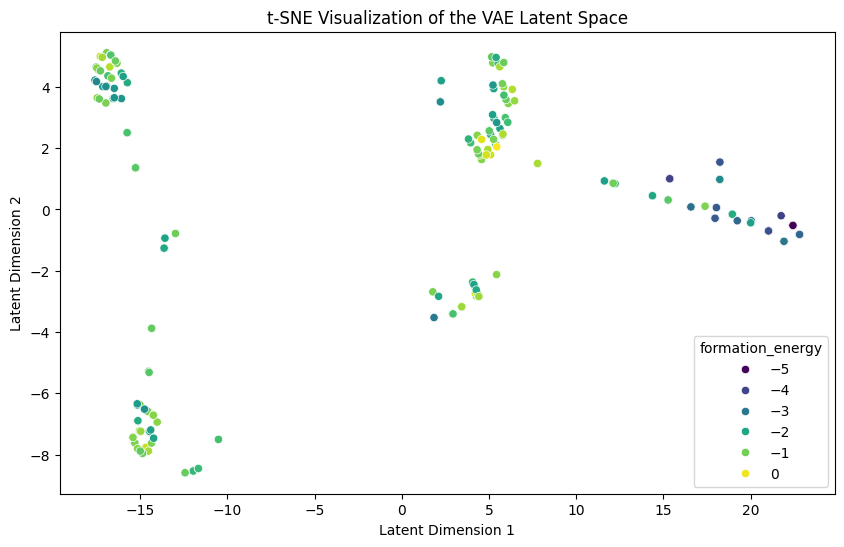

In [ ]:
# Visualize your data before attempting model fitting:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif']]
y = df['formation_energy']

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X)

# Convert to DataFrame
df_latent = pd.DataFrame(X_2d, columns=["Latent_X", "Latent_Y"])
df_latent["formation_energy"] = df["formation_energy"]  # Add band gap info for coloring

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Latent_X", y="Latent_Y", hue="formation_energy", palette="viridis", data=df_latent)
# plt.colorbar(label="formation_energy (eV)")
plt.title("t-SNE Visualization of the VAE Latent Space")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

PCA

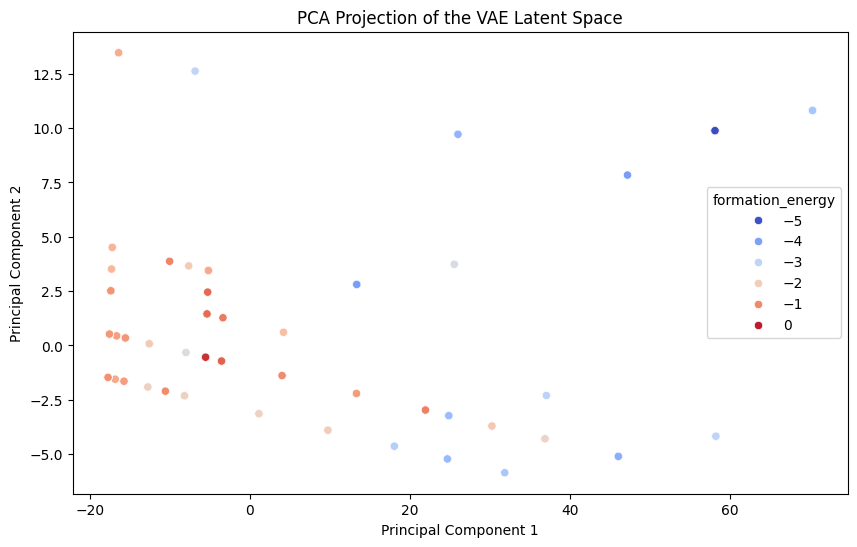

In [ ]:
from sklearn.decomposition import PCA

# Reduce latent space to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["formation_energy"] = df["formation_energy"]

# Plot PCA latent space
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="formation_energy", palette="coolwarm", data=df_pca)
# plt.colorbar(label="formation energy (eV)")
plt.title("PCA Projection of the VAE Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


###Task #1:
- Identify patterns in the data by using data visualization (PCA, tSNE, K-means clustering).
- What is an appropriate goal for this study? What property can be partitioned into classes? The formation energy? The magneic moment? Or the magnetic order?
- What are appropriate materials descriptors if your goal is to investigate the above target property? [HINT: see descriptors used in the sci reports paper or use your physical intuition'
- Visualize the results using PCA, tSNE and K-means clustering



### PCA with new target property
- choose descriptors to suit target
- create a visualization and color markers with target property

In [ ]:
# insert your code here

###tSNE with new target proerty
- choose descriptors to suit target
- create a visualization and color markers with target property

In [ ]:
# insert your code here

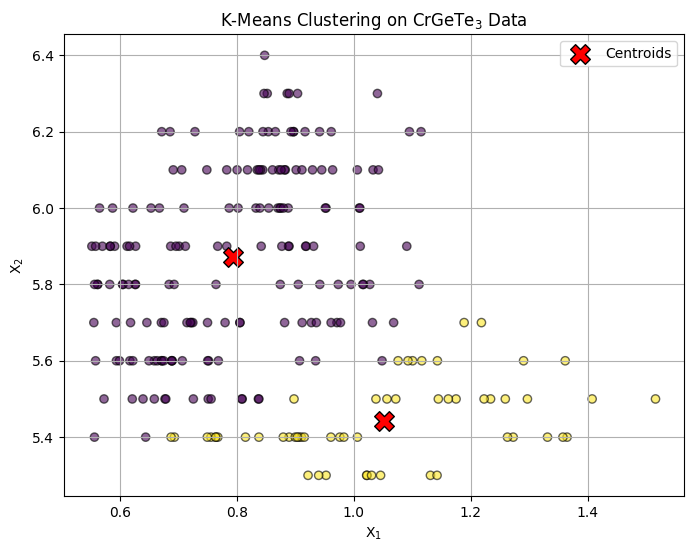

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


n_clusters = 2
random_state = 42

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
kmeans.fit(X)
y_pred = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
# Make arbitratry 2d projection on X for visualization
# Consider implementing a better approach to X.iloc[:,0] and X.iloc[:,1]
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', edgecolors='black', label="Centroids")

plt.title("K-Means Clustering on CrGeTe$_3$ Data")
plt.xlabel("X$_1$")
plt.ylabel("X$_2$")
plt.legend()
plt.grid(True)
plt.show()


### Question
- Do the clusters correspond to some physically releveant quantity?
- How can we check our hypothesis?

If time permits (and later at home) explore the following for this Cr$_2$Ge$_2$Te$_6$ dataset:
- Associative rule learning
- Generative modeling